In [24]:
!apt-get update -y
!apt-get install poppler-utils -y

Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian bullseye-updates InRelease
Hit:3 http://security.debian.org/debian-security bullseye-security InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libnspr4 libnss3 libpoppler102
The following NEW packages will be installed:
  libnspr4 libnss3 libpoppler102 poppler-utils
0 upgraded, 4 newly installed, 0 to remove and 33 not upgraded.
Need to get 3283 kB of archives.
After this operation, 9559 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian bullseye/main amd64 libnspr4 amd64 2:4.29-1 [112 kB]
Get:2 http://deb.debian.org/debian bullseye/main amd64 libnss3 amd64 2:3.61-1+deb11u3 [1305 kB]
Get:3 http://deb.debian.org/debian bullseye/main amd64 libpoppler102 amd64 20.09.0-3.1+deb11u1 [1676 kB]
Get:4 http://deb.debian.org/debian bullseye/ma

In [25]:
!pip install amazon-textract-textractor[pdf] -q

DEPRECATION: amazon-textract-pipeline-pagedimensions 0.0.8 has a non-standard dependency specifier Pillow>=9.4.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of amazon-textract-pipeline-pagedimensions or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: amazon-textract-pipeline-pagedimensions 0.0.8 has a non-standard dependency specifier pypdf>=2.5.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of amazon-textract-pipeline-pagedimensions or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [26]:
import pandas as pd
from collections import OrderedDict
import boto3
from PIL import Image

In [27]:
textract = boto3.client('textract')

## Extraindo o texto de uma imagem

In [28]:
def load_image(filename):
    with open(filename, "rb") as imageFile:
      f = imageFile.read()
      return bytearray(f)

def save_words(textract_response):
    words=[]
    blocks = textract_response['Blocks']
    for block in blocks:
        if block['BlockType'] == 'WORD':
           words.append(block)
    return words

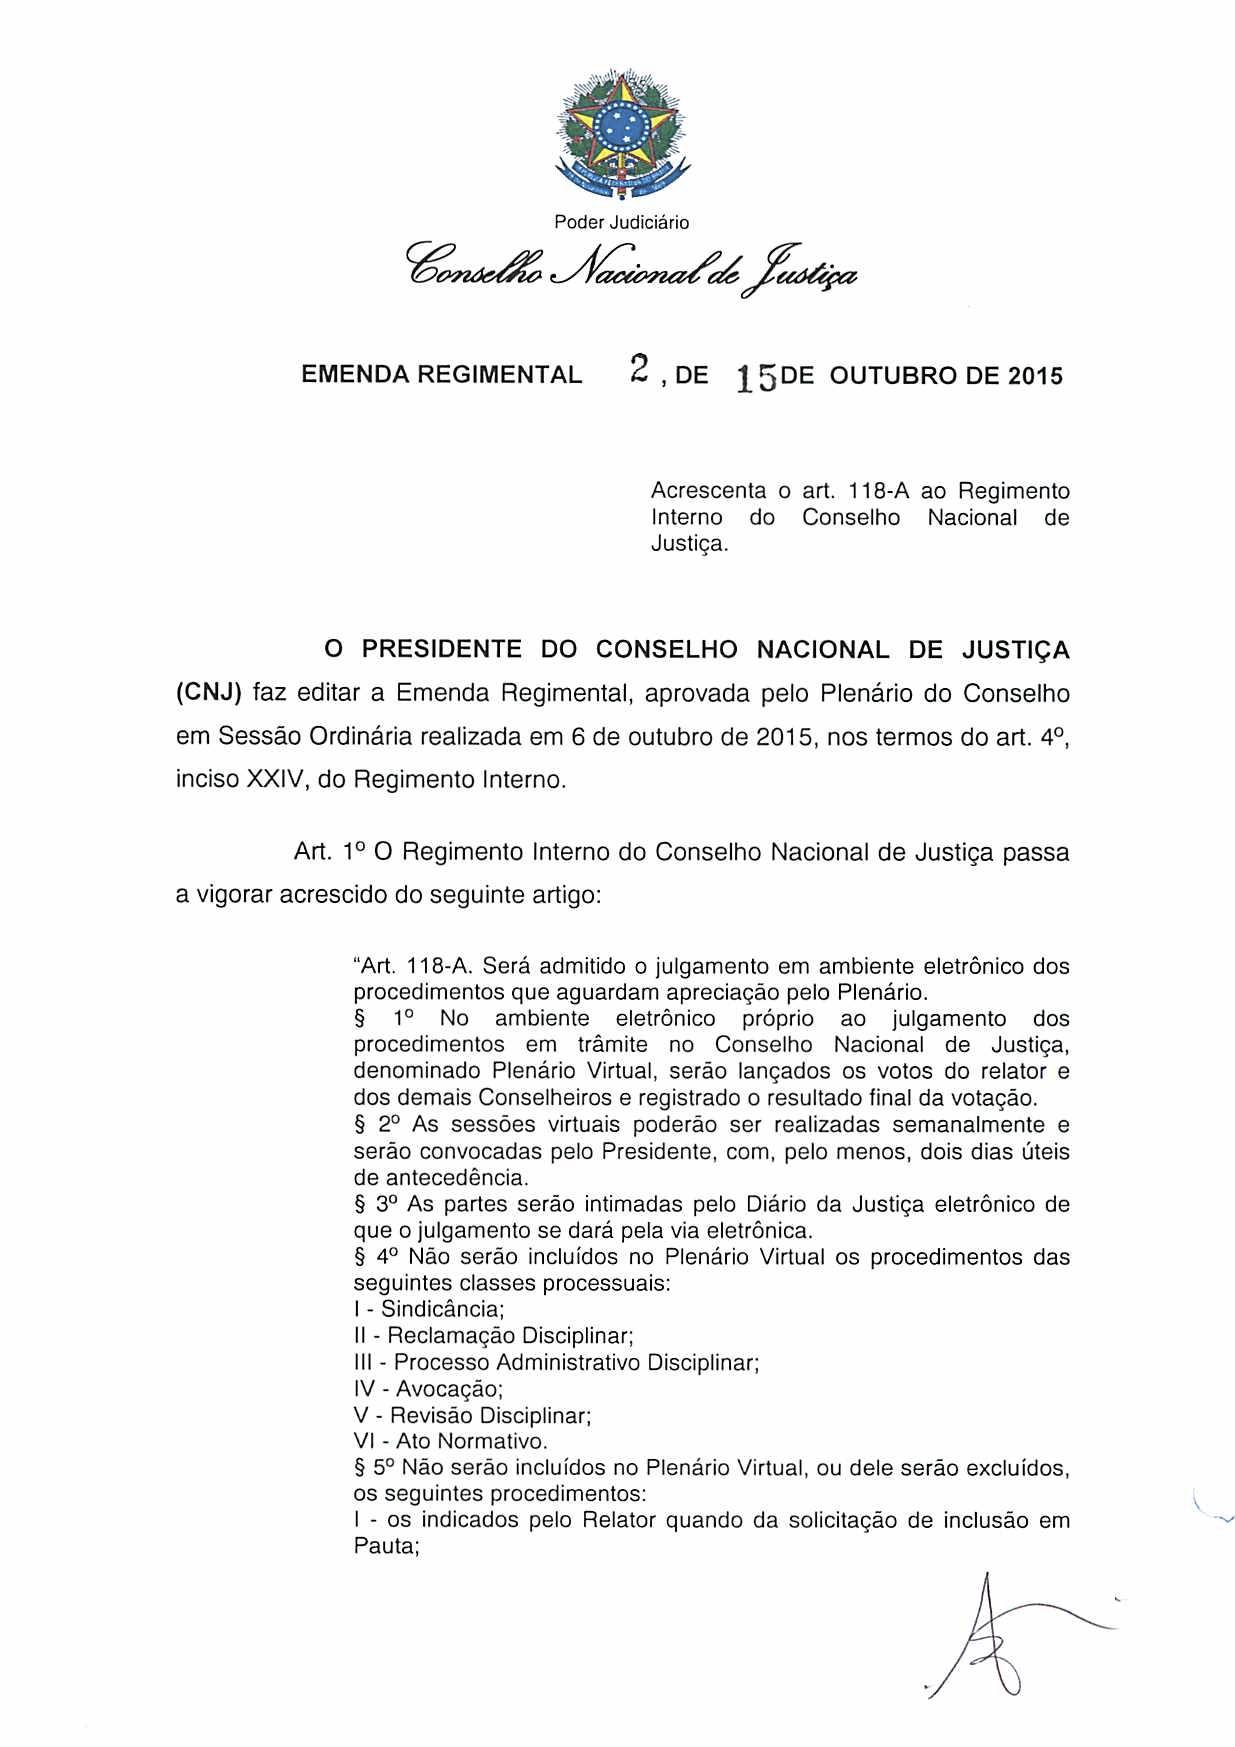

In [29]:
file_dir = 'documents'
sample_file = f'{file_dir}/emenda.jpg'
Image.open(sample_file)

In [30]:
response = textract.detect_document_text(
    Document={
        'Bytes': load_image(sample_file),
    }
)

response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 6.604423674616555e-07, 'Y': 0.0},
     {'X': 1.0, 'Y': 9.587789691067883e-07},
     {'X': 1.0, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0}]},
   'Id': 'ea031a0b-3fcf-4f7c-be8c-bc37dc6585e5',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['b9e9801a-2439-4bcb-a4f7-89a78bc4876c',
      '71308846-6c72-4b36-8aec-1222a740a741',
      'a8eb085a-5bd3-4fcb-a2f6-0f882f08a5f7',
      '522ccb2b-00bd-4e32-bd49-fb48b6bff816',
      'e36b213a-b960-40b7-a1e7-4f60ab31017e',
      'a59f40d8-e60f-46a4-a3f6-a41183d64823',
      '98ced438-ad80-47ae-a0ee-edbb184cfebe',
      '467f8e20-3ca3-40bd-a891-2b66f086c11a',
      '178aa71b-1229-4e8b-834d-f1758d05a4ce',
      'dd3e8676-393a-4c1d-a40d-74735baca8d9',
      '4fda30b4-2093-41eb-8233-ee9f15db46f8',
      'fea54a8c-00ca-4f36-88ee-f56ff4503a44',
      'b6cf3152-0784-45a0

In [31]:
words = save_words(response)
len(words)

239

In [32]:
text = ''
for word in words:
    text += word['Text']+' '
print(text)

Poder Judiciário Conselho Nacional de Justiza EMENDA REGIMENTAL 2,DE 15DE OUTUBRO DE 2015 Acrescenta o art. 118-A ao Regimento Interno do Conselho Nacional de Justiça. o PRESIDENTE DO CONSELHO NACIONAL DE JUSTIÇA (CNJ) faz editar a Emenda Regimental, aprovada pelo Plenário do Conselho em Sessão Ordinária realizada em 6 de outubro de 2015, nos termos do art. 4°, inciso XXIV, do Regimento Interno. Art. 1° o Regimento Interno do Conselho Nacional de Justiça passa a vigorar acrescido do seguinte artigo: "Art. 118-A. Será admitido o julgamento em ambiente eletrônico dos procedimentos que aguardam apreciação pelo Plenário. § 1° No ambiente eletrônico próprio ao julgamento dos procedimentos em trâmite no Conselho Nacional de Justiça, denominado Plenário Virtual, serão lançados os votos do relator e dos demais Conselheiros e registrado o resultado final da votação. § 2° As sessões virtuais poderão ser realizadas semanalmente e serão convocadas pelo Presidente, com, pelo menos, dois dias úteis 

### Utilizando biblioteca de alto nível

In [33]:
from textractor import Textractor

In [34]:
extractor = Textractor(region_name="us-east-1")

In [35]:
document = extractor.detect_document_text(file_source=sample_file, save_image=True)

In [36]:
document.pages

[This Page (1) holds the following data:
 Words - 239
 Lines - 36
 Key-values - 0
 Checkboxes - 0
 Tables - 0
 Queries - 0
 Signatures - 0
 Expense documents - 0]

In [37]:
document.pages[0].lines

[Poder Judiciário,
 Conselho Nacional de Justiza,
 EMENDA REGIMENTAL,
 2,DE 15DE OUTUBRO DE 2015,
 Acrescenta o art. 118-A ao Regimento,
 Interno do Conselho Nacional de,
 Justiça.,
 o PRESIDENTE DO CONSELHO NACIONAL DE JUSTIÇA,
 (CNJ) faz editar a Emenda Regimental, aprovada pelo Plenário do Conselho,
 em Sessão Ordinária realizada em 6 de outubro de 2015, nos termos do art. 4°,,
 inciso XXIV, do Regimento Interno.,
 Art. 1° o Regimento Interno do Conselho Nacional de Justiça passa,
 a vigorar acrescido do seguinte artigo:,
 "Art. 118-A. Será admitido o julgamento em ambiente eletrônico dos,
 procedimentos que aguardam apreciação pelo Plenário.,
 § 1° No ambiente eletrônico próprio ao julgamento dos,
 procedimentos em trâmite no Conselho Nacional de Justiça,,
 denominado Plenário Virtual, serão lançados os votos do relator e,
 dos demais Conselheiros e registrado o resultado final da votação.,
 § 2° As sessões virtuais poderão ser realizadas semanalmente e,
 serão convocadas pelo Pres

In [38]:
document.pages[0].words

[Poder,
 Judiciário,
 Conselho,
 Nacional de,
 Justiza,
 EMENDA,
 REGIMENTAL,
 DE,
 OUTUBRO,
 2015,
 2,DE,
 15DE,
 o,
 ao,
 118-A,
 art.,
 Acrescenta,
 Regimento,
 do,
 Interno,
 Conselho,
 de,
 Nacional,
 Justiça.,
 o,
 DO,
 PRESIDENTE,
 CONSELHO,
 NACIONAL,
 DE,
 JUSTIÇA,
 faz,
 editar,
 a,
 Emenda,
 do,
 Plenário,
 Conselho,
 (CNJ),
 aprovada,
 Regimental,,
 pelo,
 em,
 Sessão,
 6,
 em,
 Ordinária,
 realizada,
 de,
 art.,
 nos,
 de,
 outubro,
 do,
 termos,
 2015,,
 4°,,
 inciso,
 do,
 Interno.,
 XXIV,,
 Regimento,
 1°,
 Art.,
 o,
 do,
 Interno,
 Conselho,
 de,
 Nacional,
 Regimento,
 passa,
 Justiça,
 a,
 do,
 acrescido,
 vigorar,
 artigo:,
 seguinte,
 118-A.,
 "Art.,
 o,
 admitido,
 Será,
 em,
 ambiente,
 dos,
 eletrônico,
 julgamento,
 Plenário.,
 procedimentos,
 que,
 apreciação,
 aguardam,
 pelo,
 1°,
 No,
 ambiente,
 ao,
 eletrônico,
 dos,
 §,
 próprio,
 julgamento,
 em,
 no,
 trâmite,
 de,
 Nacional,
 Conselho,
 procedimentos,
 Justiça,,
 Plenário,
 denominado,
 e,
 do,
 serão

ValueError: Could not save to JPEG for display

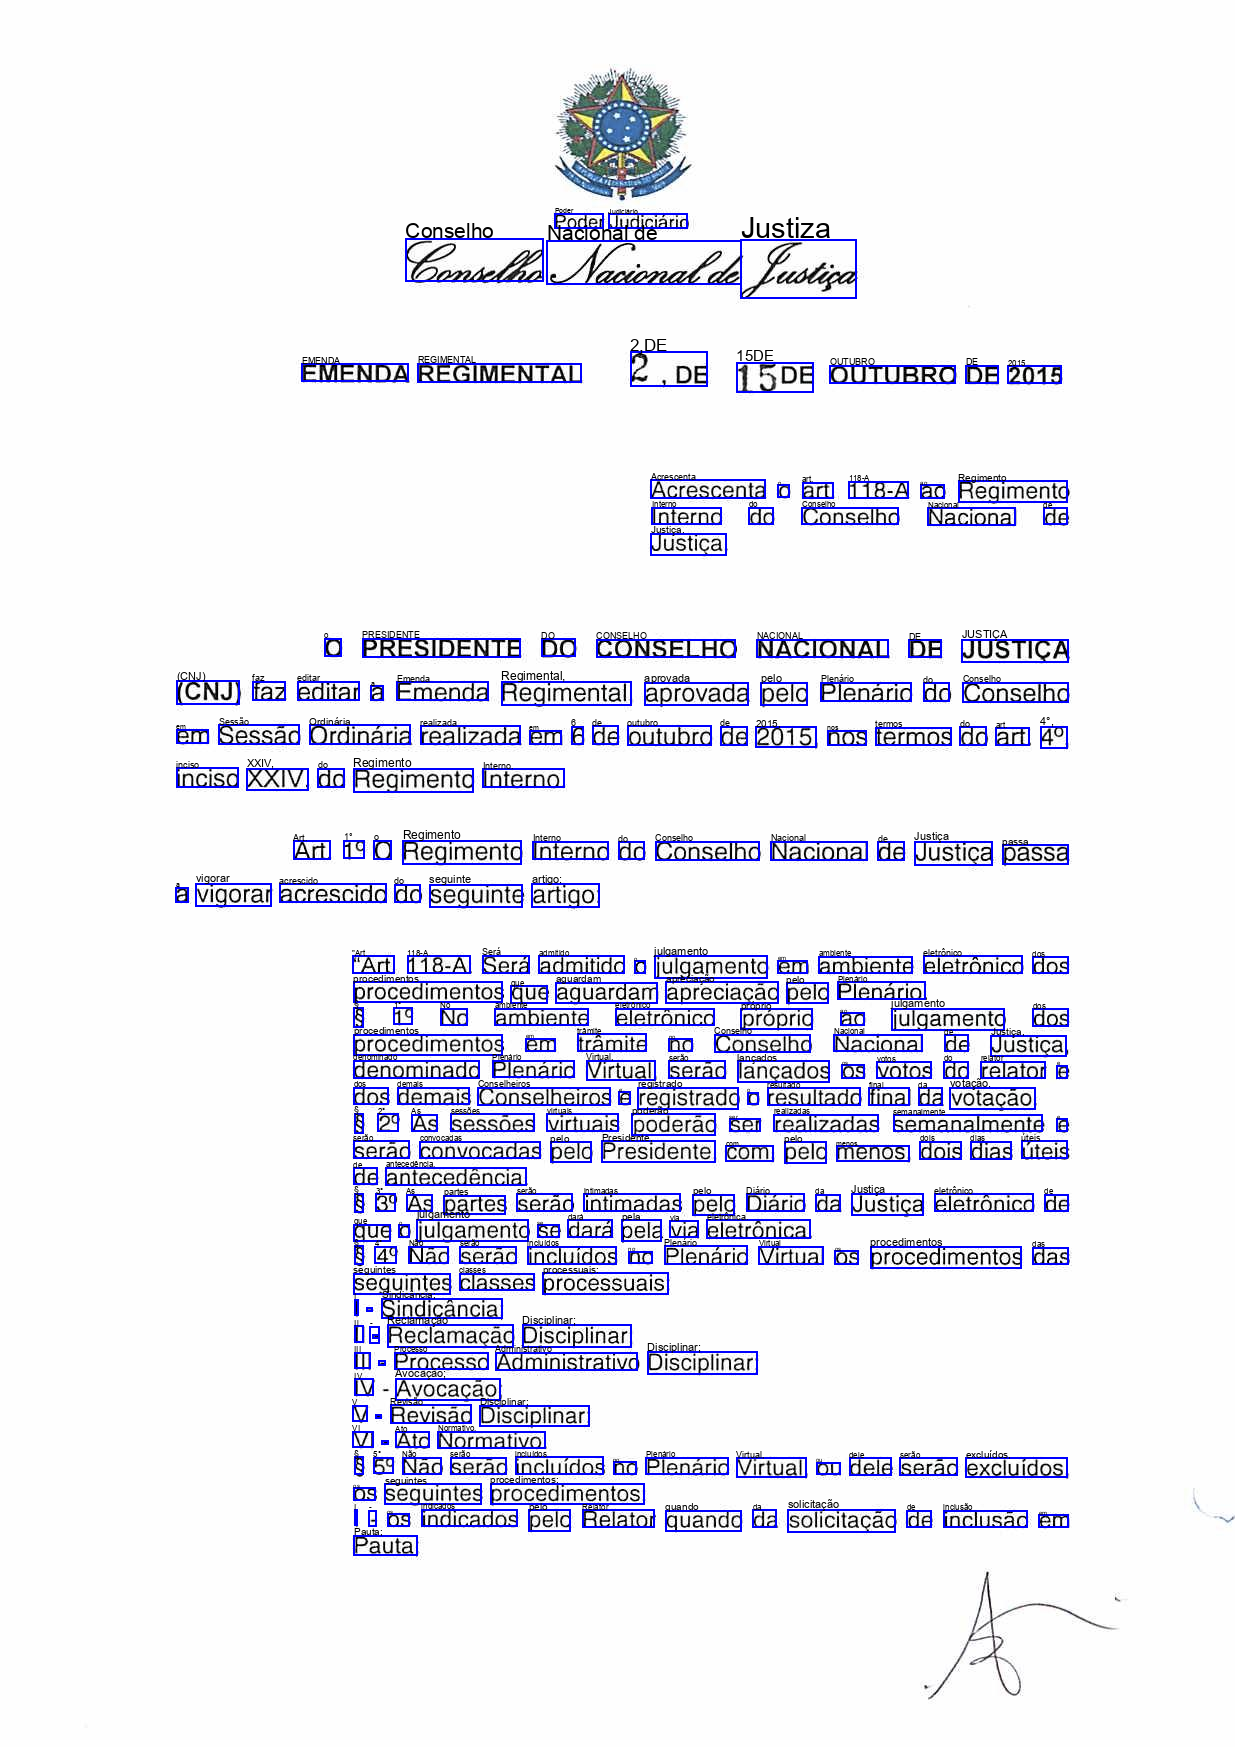

In [39]:
document.words.visualize()

## Análise de grandes documentos

In [48]:
import sagemaker
from textractor.data.constants import TextractFeatures

sess = sagemaker.Session()
bucket = sess.default_bucket()
print(bucket)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker-us-east-1-000527353527


In [44]:
file_dir = './documents'
sample_file = f'{file_dir}/acórdão.pdf'
document = extractor.start_document_text_detection(
    file_source=sample_file,
    s3_upload_path=f"s3://{bucket}/temp/"
)

In [46]:
document.pages

[This Page (1) holds the following data:
 Words - 201
 Lines - 66
 Key-values - 0
 Checkboxes - 0
 Tables - 0
 Queries - 0
 Signatures - 0
 Expense documents - 0,
 This Page (2) holds the following data:
 Words - 260
 Lines - 32
 Key-values - 0
 Checkboxes - 0
 Tables - 0
 Queries - 0
 Signatures - 0
 Expense documents - 0,
 This Page (3) holds the following data:
 Words - 283
 Lines - 33
 Key-values - 0
 Checkboxes - 0
 Tables - 0
 Queries - 0
 Signatures - 0
 Expense documents - 0,
 This Page (4) holds the following data:
 Words - 223
 Lines - 36
 Key-values - 0
 Checkboxes - 0
 Tables - 0
 Queries - 0
 Signatures - 0
 Expense documents - 0,
 This Page (5) holds the following data:
 Words - 265
 Lines - 38
 Key-values - 0
 Checkboxes - 0
 Tables - 0
 Queries - 0
 Signatures - 0
 Expense documents - 0,
 This Page (6) holds the following data:
 Words - 274
 Lines - 38
 Key-values - 0
 Checkboxes - 0
 Tables - 0
 Queries - 0
 Signatures - 0
 Expense documents - 0,
 This Page (7) holds t

In [47]:
document.pages[0].text

'AÇÃO DECLARATÓRIA DE CONSTITUCIONALIDADE 51 DISTRITO\nFEDERAL\nRELATOR\n: MIN. GILMAR MENDES\n:\nREQTE.(S)\nFEDERAÇÃO DAS ASSOCIAÇÕES DAS EMPRESAS\nBRASILEIRAS DE TECNOLOGIA DA INFORMAÇÃO -\nASSESPRO NACIONAL\n:\nADRIELE PINHEIRO REIS AYRES DE BRITTO\nADV.(A/S)\n: MARCELO MONTALVÃO MACHADO\nADV.(A/S)\n: PRESIDENTE DA REPÚBLICA\nINTDO.(A/S)\n: ADVOGADO-GERAL DA UNIÃO\nPROC.(A/S)(ES)\n: CONGRESSO NACIONAL\nINTDO.(\n: ADVOGADO-GERAL DO SENADO FEDERAL\nADV.(A/S)\nAM. CURIAE.\n: FACEBOOK SERVIÇOS ONLINE DO BRASIL LTDA\n: THIAGO LUÍS SANTOS SOMBRA\nADV.(A/S)\n: FERNANDO DANTAS MOTTA NEUSTEIN\nADV.(A/S)\n:\nAM. CURIAE.\nVERIZON MEDIA DO BRASIL INTERNET LTDA\n(ATUAL DENOMINAÇÃO DE OATH DO BRASIL\nINTERNET LTDA, ANTERIORMENTE CONHECIDA\nCOMO YAHOO! DO BRASIL INTERNET LTDA -\nVERIZON MEDIA BRASIL)\n: ANDRÉ ZONARO GIACCHETTA\nADV.(A/S)\nADV.(A/S)\n: VICENTE COELHO ARAÚJO\n: CIRO TORRES FREITAS\nADV.(A/S)\nAM. CURIAE.\n: INSTITUTO DE REFERÊNCIA EM INTERNET E\nSOCIEDADE - IRIS\n: HIGOR PEDROSO NEV

In [49]:
document = extractor.start_document_analysis(
    file_source=sample_file,
    s3_upload_path=f"s3://{bucket}/temp/",
    features=[TextractFeatures.FORMS]
)

In [51]:
document.get("relator")

[Relator: : ROMÃO C. OLIVEIRA, CÂMARA CRIMINAL, Data]